# Import Modules

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

sys.path.insert(
    0,
    os.path.join(
        os.environ["PROJ_irox"],
        "data"))
from proj_data_irox import proj_dir_name, irox_bulk_color_map

# #############################################################################
import pickle

import plotly.plotly as py
import plotly.offline as py_off
from plotly.offline import (
    init_notebook_mode,
    iplot,
    )

# #############################################################################
from methods import (
    create_pourbaix_plot,
    create_outside_borders,
    create_pourb_entry_outline,
    create_oer_equil_line,
    )

init_notebook_mode(connected=True)

# Script Inputs

In [3]:
run_create_entries_script = True
with_iro3 = True

# axis_ranges = {
#     "x_axis": [-2, 16],
#     "y_axis": [-3, 3],
#     }

axis_ranges = {
    "x_axis": [0., 16],
    "y_axis": [0., 2.5],
    }

save_plot = True

entries_to_remove_list = [
    "IrO3_rutile-like",
    "IrO3_battery",
#     "IrO3_a-AlF3",
    ]

# Load Entry Data

In [4]:
%%capture
if run_create_entries_script:
    !python sc_create_all_entries.py

all_entries = pickle.load(open("all_entries.pickle", "rb"))

# Process Data for Plotting

In [5]:
directory = "00_figures"
if not os.path.exists(directory):
    os.makedirs(directory)

data_entry_borders = create_pourb_entry_outline(
    entries_to_remove_list=entries_to_remove_list,
    all_entries=all_entries)
outside_border = create_outside_borders(axis_ranges=axis_ranges)
data, layout = create_pourbaix_plot(entries=all_entries, axis_ranges=axis_ranges)
oer_equil_line = create_oer_equil_line(axis_ranges=axis_ranges)

data += data_entry_borders
data += [outside_border]
data += [oer_equil_line]

# Plotting

In [6]:
if save_plot:
    save_dir = proj_dir_name
else:
    save_dir = "__temp__"

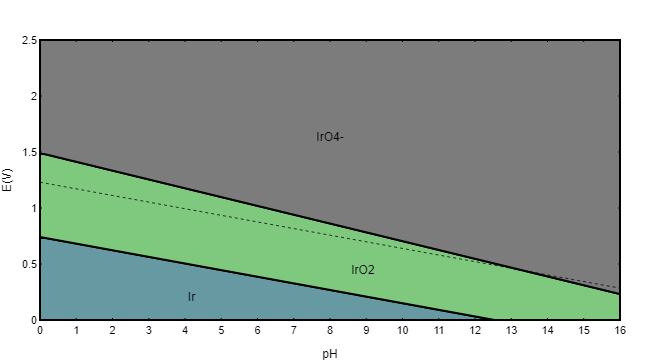

/home/raulf2012/miniconda2/envs/py36/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [7]:
fig = dict(data=data, layout=layout)
py_off.iplot(fig)

if with_iro3:
    py.iplot(fig, filename=os.path.join(save_dir, "bulk_pourbiax", "pl_bulk_pourbaix__regular"))
else:
    py.iplot(fig, filename=os.path.join(save_dir, "bulk_pourbiax", "pl_bulk_pourbaix_wo_iro3__regular"))

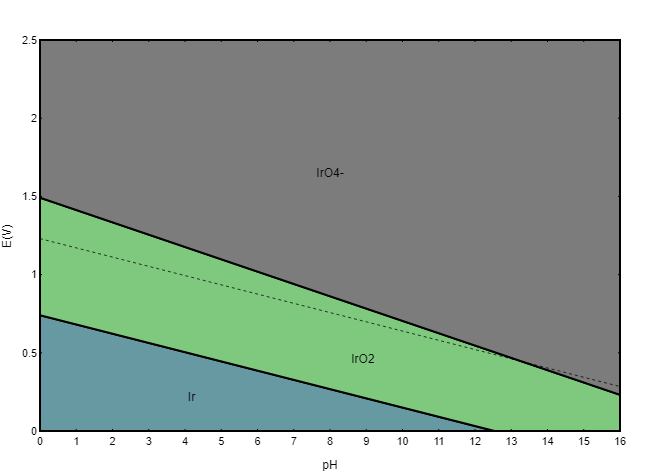

'00_figures/fig01_alf3.html'

In [8]:
layout["height"] = 2 * 6. * 37.795275591
layout["width"] = 2 * 9. * 37.795275591

py_off.iplot(fig)
py_off.plot(fig, filename=os.path.join(directory, "fig01_alf3.html"))

# py.iplot(fig, filename=os.path.join(save_dir, "bulk_pourbiax", "pl_bulk_pourbaix__large"))